# Class Workbook

This is coding portion of your class workbook.  Please go through the sections below

## Welcome to MA679

Every module of the course will have a GitHub class that contains the chapter lab from your textbook and this application material, like your workbook/homework. You are expected to work on these materials during the class, but what you don't finish will become your homework.  At the end of each class, you must commit your work as proof of your class participation.

***

## In class activity

In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
#import ISLP as islp

### Ames Housing data

In our first class, we will look at the Ames Housing data.
Please install `AmesHousing` package and look at the raw data.

In [8]:
ames_raw=pd.read_csv("ames_raw.csv")
ames_raw

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


The outcome variable of interest is `SalePrice` and you have a lot of features for each home.

A sample of them include

- `Year Built`: Original construction date
- `Lot Frontage`: Linear feet of street connected to the property
- `Lot Area`: Lot size in square feet
- `Neighborhood`: Physical locations within Ames city limits (map available)
- `Overall Qual`: Rates the overall material and finish of the house
- `Overall Cond`: Rates the overall condition of the house
- `Total Bsmt SF`: Total square feet of the basement area
- `1st Flr SF`: First Floor square feet
- `2nd Flr SF`: Second floor square feet
- `Gr Liv Area`: Above grade (ground) living area square feet
- `Bedroom`: Bedrooms above grade (does NOT include basement bedrooms)
- `Kitchen`: Kitchens above grade
- `KitchenQual`: Kitchen quality
- `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)
- `Bsmt Full Bath`: Basement full bathrooms
- `Bsmt Half Bath`: Basement half bathrooms
- `Full Bath`: Full bathrooms above grade
- `Half Bath`: Half baths above grade, etc.

### Questions

- How many observations and features do you have in the data?

Your code:

In [10]:
observations, features = ames_raw.shape
print("Number of observations:", observations)
print("Number of features:", features-2)


Number of observations: 2930
Number of features: 80


Your answer: There are 2930 observations and 80 features.(Except 'ORDER' and 'PID')

~~~
Please write your answer in full sentences.


~~~
Please make some EDA figures to explore some of the most likely features associated with `SalePrice`
- .

Your code:

            Feature  Correlation with SalePrice
0         SalePrice                    1.000000
1      Overall Qual                    0.799262
2       Gr Liv Area                    0.706780
3       Garage Cars                    0.647877
4       Garage Area                    0.640401
5     Total Bsmt SF                    0.632280
6        1st Flr SF                    0.621676
7        Year Built                    0.558426
8         Full Bath                    0.545604
9    Year Remod/Add                    0.532974
10    Garage Yr Blt                    0.526965
11     Mas Vnr Area                    0.508285
12    TotRms AbvGrd                    0.495474
13       Fireplaces                    0.474558
14     BsmtFin SF 1                    0.432914
15     Lot Frontage                    0.357318
16     Wood Deck SF                    0.327143
17    Open Porch SF                    0.312951
18        Half Bath                    0.285056
19   Bsmt Full Bath                    0

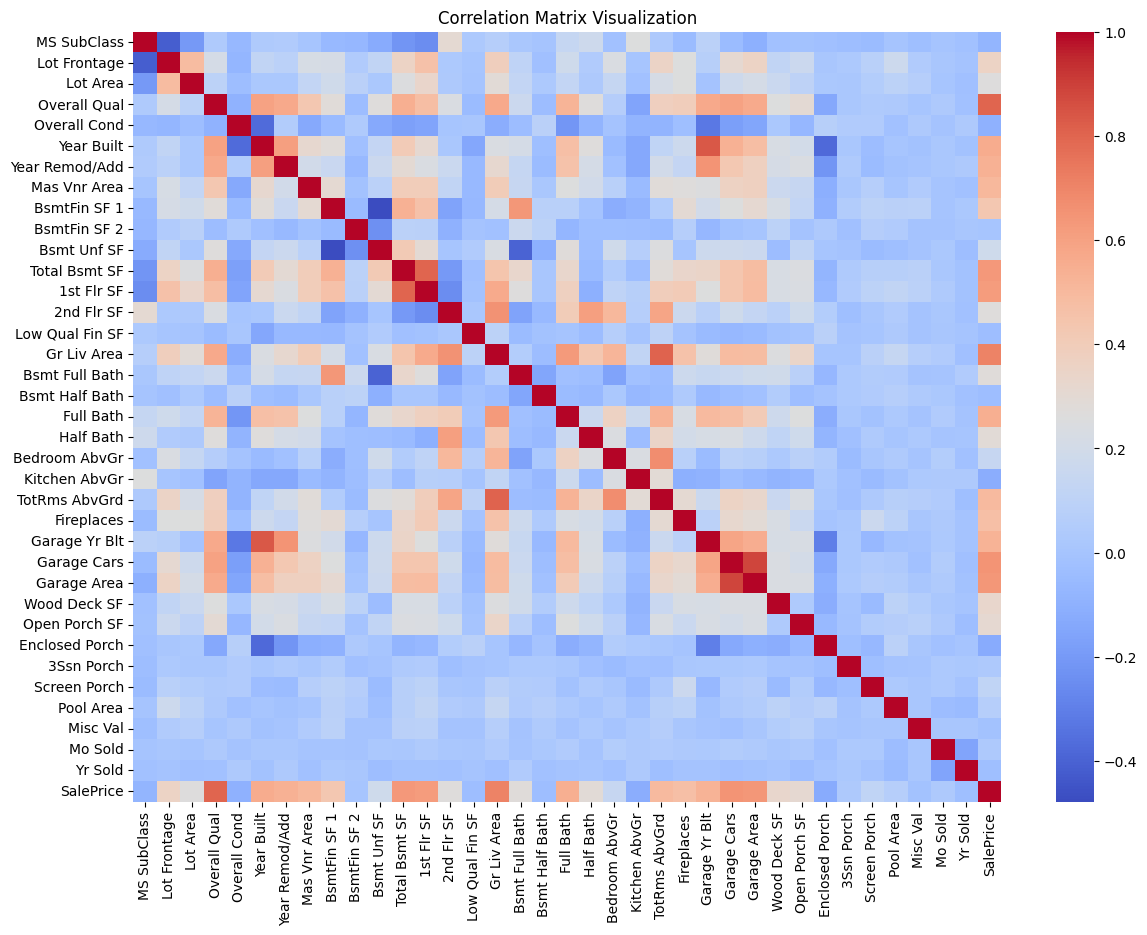

In [18]:
ames_raw_1 = ames_raw.iloc[:, 2:]

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ames_raw_1.select_dtypes(include=['number'])

correlation_data = numerical_columns.corr()

saleprice_correlation = correlation_data['SalePrice'].sort_values(ascending=False)

saleprice_correlation_df = saleprice_correlation.reset_index()
saleprice_correlation_df.columns = ['Feature', 'Correlation with SalePrice']

print(saleprice_correlation_df)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_data, cmap='coolwarm', annot=False, fmt=".2f", cbar=True)
plt.title('Correlation Matrix Visualization')
plt.show()




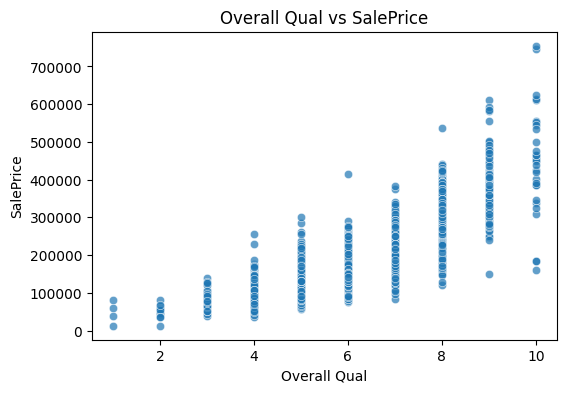

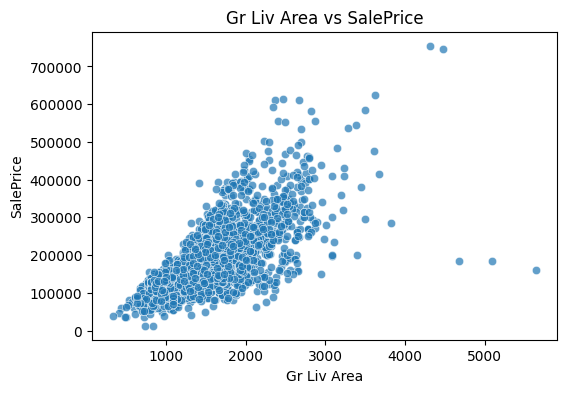

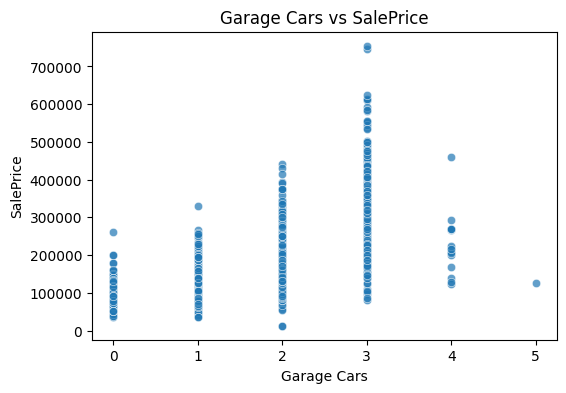

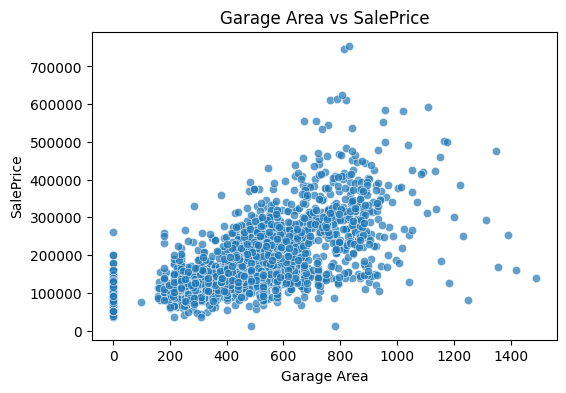

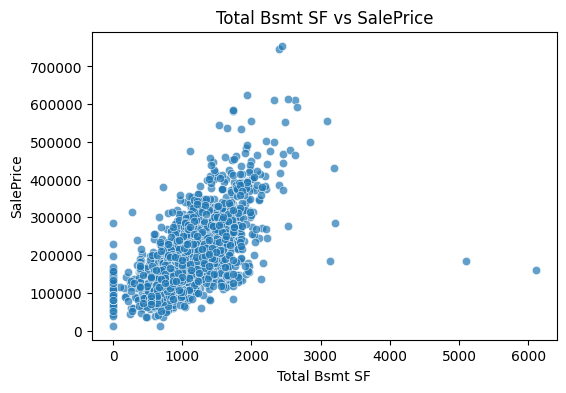

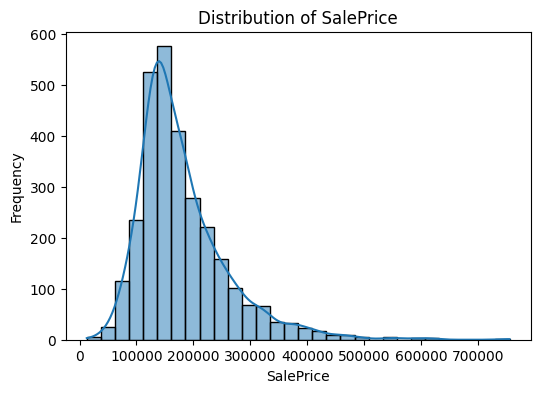

In [22]:

top_features = saleprice_correlation_df.iloc[1:6]['Feature']


for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=ames_raw_1[feature], y=ames_raw_1['SalePrice'], alpha=0.7)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()


plt.figure(figsize=(6, 4))
sns.histplot(ames_raw_1['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


Your answer:Following are top 5 features.
1     Overall Qual
2      Gr Liv Area
3      Garage Cars
4      Garage Area
5    Total Bsmt SF

~~~
Please write your answer in full sentences.


~~~

- Are there any structures in the data?  Obvious correlations to be aware of?

Your code:

Features strongly correlated with SalePrice:
SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
Name: SalePrice, dtype: float64


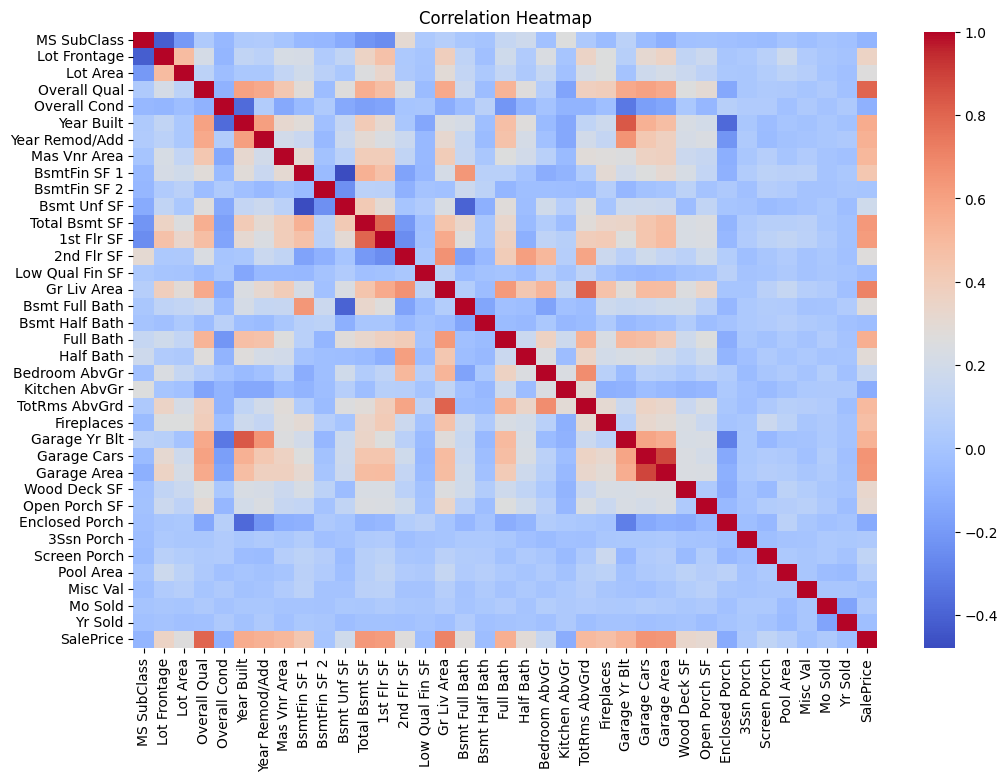

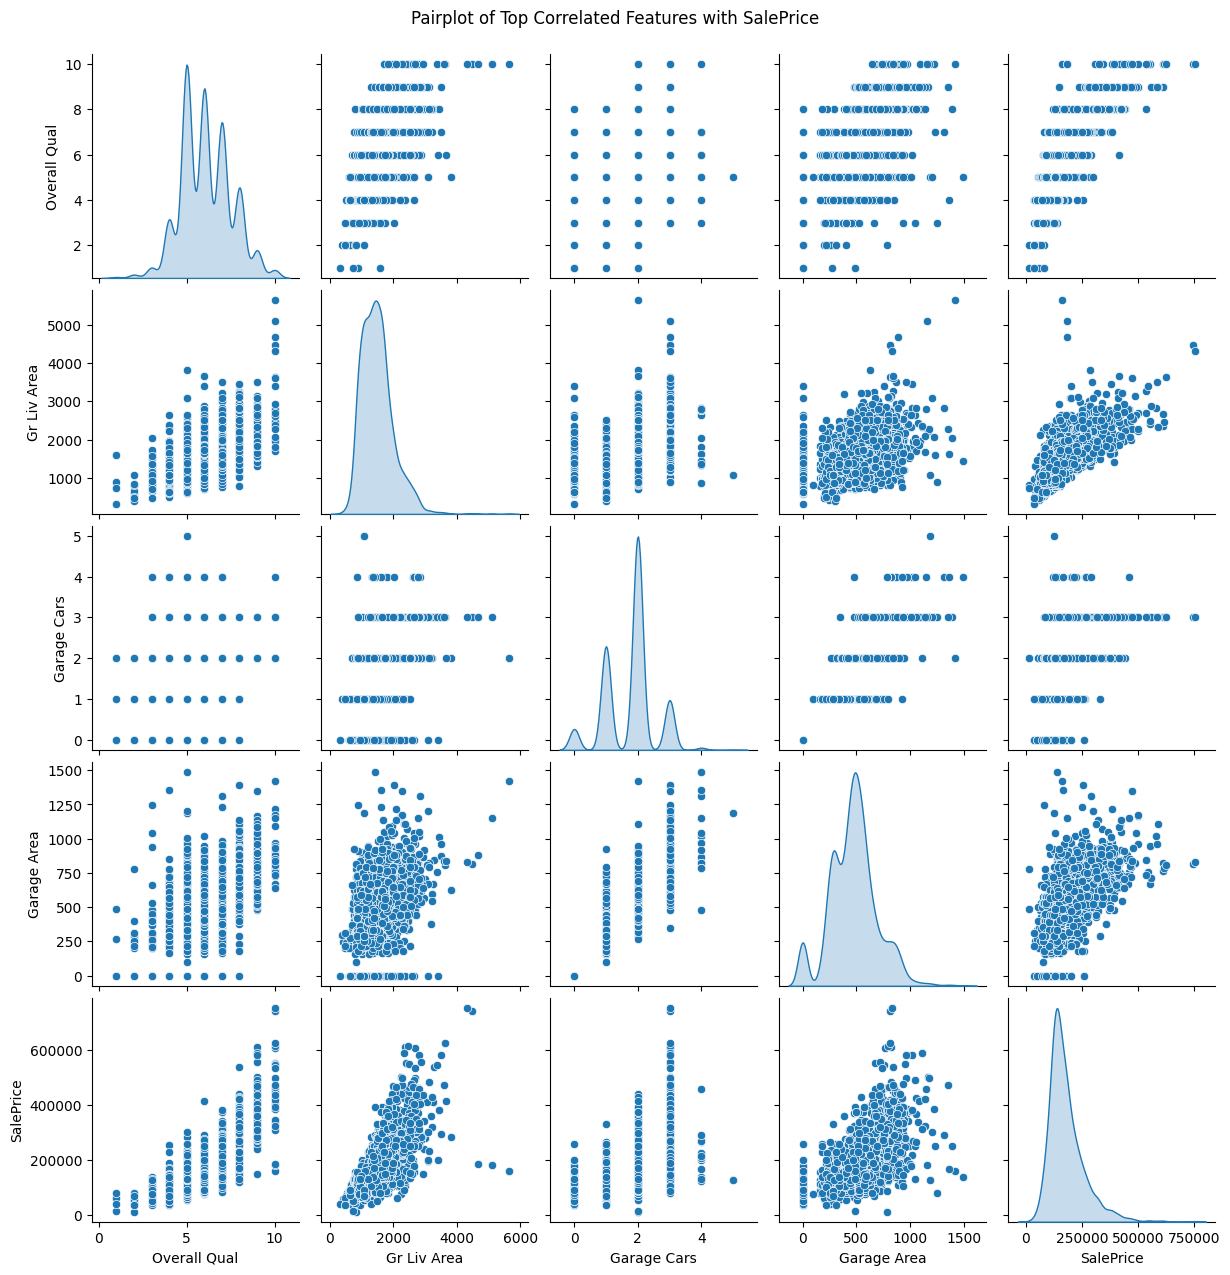

In [24]:
numeric_features = ames_raw_1.select_dtypes(include=['number'])
correlation_matrix = numeric_features.corr()

# Find features strongly correlated with SalePrice
strong_correlations = correlation_matrix['SalePrice'][abs(correlation_matrix['SalePrice']) > 0.5].sort_values(ascending=False)

# Print features with strong correlations
print("Features strongly correlated with SalePrice:")
print(strong_correlations)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Plot pairplot for top correlated features
top_features = strong_correlations.index[1:5]  # Exclude SalePrice itself
sns.pairplot(ames_raw_1, vars=top_features.append(pd.Index(['SalePrice'])), diag_kind="kde")
plt.suptitle("Pairplot of Top Correlated Features with SalePrice", y=1.02)
plt.show()

Your answer:

~~~
Please write your answer in full sentences.

These features which are > 0.5 are strongly correlated with Saleprice.
SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
~~~

***

## Problem Set

### [Required] Auto Data

This exercise involves the `Auto` data set studied in the lab. Make sure that the missing values have been removed from the data.

(a) Which of the predictors are quantitative, and which are qualitative?

Your code:

In [25]:
Auto=pd.read_csv("Auto.csv")
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Your answer:
Followings are quantiative features.
mpg (Miles per gallon)
cylinders
displacement
horsepower
weight
acceleration
year 

Followings are qualitative.
origin (Likely representing the region of origin, e.g., 1, 2, or 3 corresponding to specific regions)
name (Car names, which are text strings representing the make and model)

~~~
Please write your answer in full sentences.


~~~


(b) What is the range of each quantitative predictor? You can answer this using the min() and max() methods in numpy.

Your code:

In [27]:

import numpy as np


quantitative_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']


for col in quantitative_columns:
    min_val = np.min(Auto[col])
    max_val = np.max(Auto[col])
    print(f"{col}: Min = {min_val}, Max = {max_val}")



mpg: Min = 9.0, Max = 46.6
cylinders: Min = 3, Max = 8
displacement: Min = 68.0, Max = 455.0
horsepower: Min = 46, Max = 230
weight: Min = 1613, Max = 5140
acceleration: Min = 8.0, Max = 24.8
year: Min = 70, Max = 82


Your answer:

~~~
Please write your answer in full sentences.
The quantitative predictors in the dataset have the following ranges: `mpg` ranges from 9.0 to 46.6, `cylinders` ranges from 3 to 8, `displacement` ranges from 68.0 to 455.0, `horsepower` ranges from 46 to 230, `weight` ranges from 1613 to 5140, `acceleration` ranges from 8.0 to 24.8, and `year` ranges from 70 to 82.

~~~


(c) What is the mean and standard deviation of each quantitative predictor?

Your code:

In [28]:

statistics = {col: {'mean': Auto[col].mean(), 'std': Auto[col].std()} for col in quantitative_columns}

for col, stats in statistics.items():
    print(f"{col}: Mean = {stats['mean']:.2f}, Standard Deviation = {stats['std']:.2f}")

#

mpg: Mean = 23.45, Standard Deviation = 7.81
cylinders: Mean = 5.47, Standard Deviation = 1.71
displacement: Mean = 194.41, Standard Deviation = 104.64
horsepower: Mean = 104.47, Standard Deviation = 38.49
weight: Mean = 2977.58, Standard Deviation = 849.40
acceleration: Mean = 15.54, Standard Deviation = 2.76
year: Mean = 75.98, Standard Deviation = 3.68


Your answer:
The quantitative predictors in the dataset have the following statistics: `mpg` has a mean of 23.45 and a standard deviation of 7.81, `cylinders` has a mean of 5.47 and a standard deviation of 1.71, `displacement` has a mean of 194.41 and a standard deviation of 104.64, `horsepower` has a mean of 104.47 and a standard deviation of 38.49, `weight` has a mean of 2977.58 and a standard deviation of 849.40, `acceleration` has a mean of 15.54 and a standard deviation of 2.76, and `year` has a mean of 75.98 and a standard deviation of 3.68.
~~~
Please write your answer in full sentences.


~~~


(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

Your code:

In [29]:

Auto_subset = Auto.drop(Auto.index[9:85])


subset_statistics = {
    col: {
        'range': (Auto_subset[col].min(), Auto_subset[col].max()),
        'mean': Auto_subset[col].mean(),
        'std': Auto_subset[col].std()
    }
    for col in quantitative_columns
}


for col, stats in subset_statistics.items():
    print(f"{col}: Range = {stats['range']}, Mean = {stats['mean']:.2f}, Standard Deviation = {stats['std']:.2f}")

#

mpg: Range = (np.float64(11.0), np.float64(46.6)), Mean = 24.40, Standard Deviation = 7.87
cylinders: Range = (np.int64(3), np.int64(8)), Mean = 5.37, Standard Deviation = 1.65
displacement: Range = (np.float64(68.0), np.float64(455.0)), Mean = 187.24, Standard Deviation = 99.68
horsepower: Range = (np.int64(46), np.int64(230)), Mean = 100.72, Standard Deviation = 35.71
weight: Range = (np.int64(1649), np.int64(4997)), Mean = 2935.97, Standard Deviation = 811.30
acceleration: Range = (np.float64(8.5), np.float64(24.8)), Mean = 15.73, Standard Deviation = 2.69
year: Range = (np.int64(70), np.int64(82)), Mean = 77.15, Standard Deviation = 3.11


Your answer:
After removing the 10th through 85th observations, the quantitative predictors in the subset of the data have the following statistics: `mpg` has a range of 11.0 to 46.6, a mean of 24.40, and a standard deviation of 7.87; `cylinders` has a range of 3 to 8, a mean of 5.37, and a standard deviation of 1.65; `displacement` has a range of 68.0 to 455.0, a mean of 187.24, and a standard deviation of 99.68; `horsepower` has a range of 46 to 230, a mean of 100.72, and a standard deviation of 35.71; `weight` has a range of 1649 to 4997, a mean of 2935.97, and a standard deviation of 811.30; `acceleration` has a range of 8.5 to 24.8, a mean of 15.73, and a standard deviation of 2.69; and `year` has a range of 70 to 82, a mean of 77.15, and a standard deviation of 3.11.

~~~
Please write your answer in full sentences.


~~~


(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

Your code:

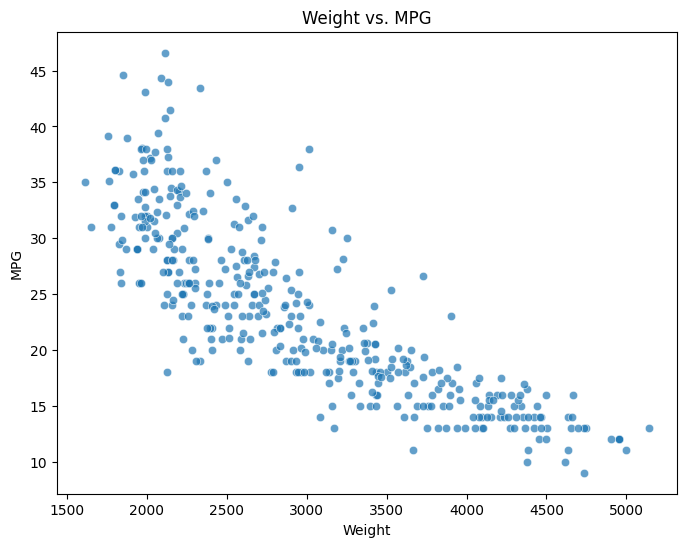

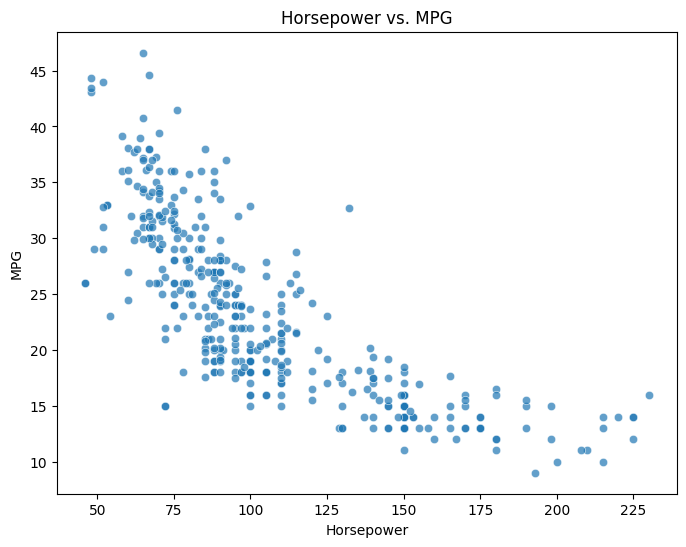

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt



# Scatterplot: Weight vs. MPG
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Auto['weight'], y=Auto['mpg'], alpha=0.7)
plt.title("Weight vs. MPG")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

# Scatterplot: Horsepower vs. MPG
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Auto['horsepower'], y=Auto['mpg'], alpha=0.7)
plt.title("Horsepower vs. MPG")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()


Your answer:
Both predictors, Weight and Horsepower, show strong negative relationships with MPG, suggesting they are significant factors influencing fuel efficiency. These findings align with expectations in automobile performance, as heavier and more powerful cars usually sacrifice fuel economy for performance and capability.

~~~
Please write your answer in full sentences.


~~~


(f) Suppose that we wish to predict gas mileage (mpg) based on the other variables. Do your plots suggest that any other variables might be helpful in predicting mpg? Justify your answer.

Your code:

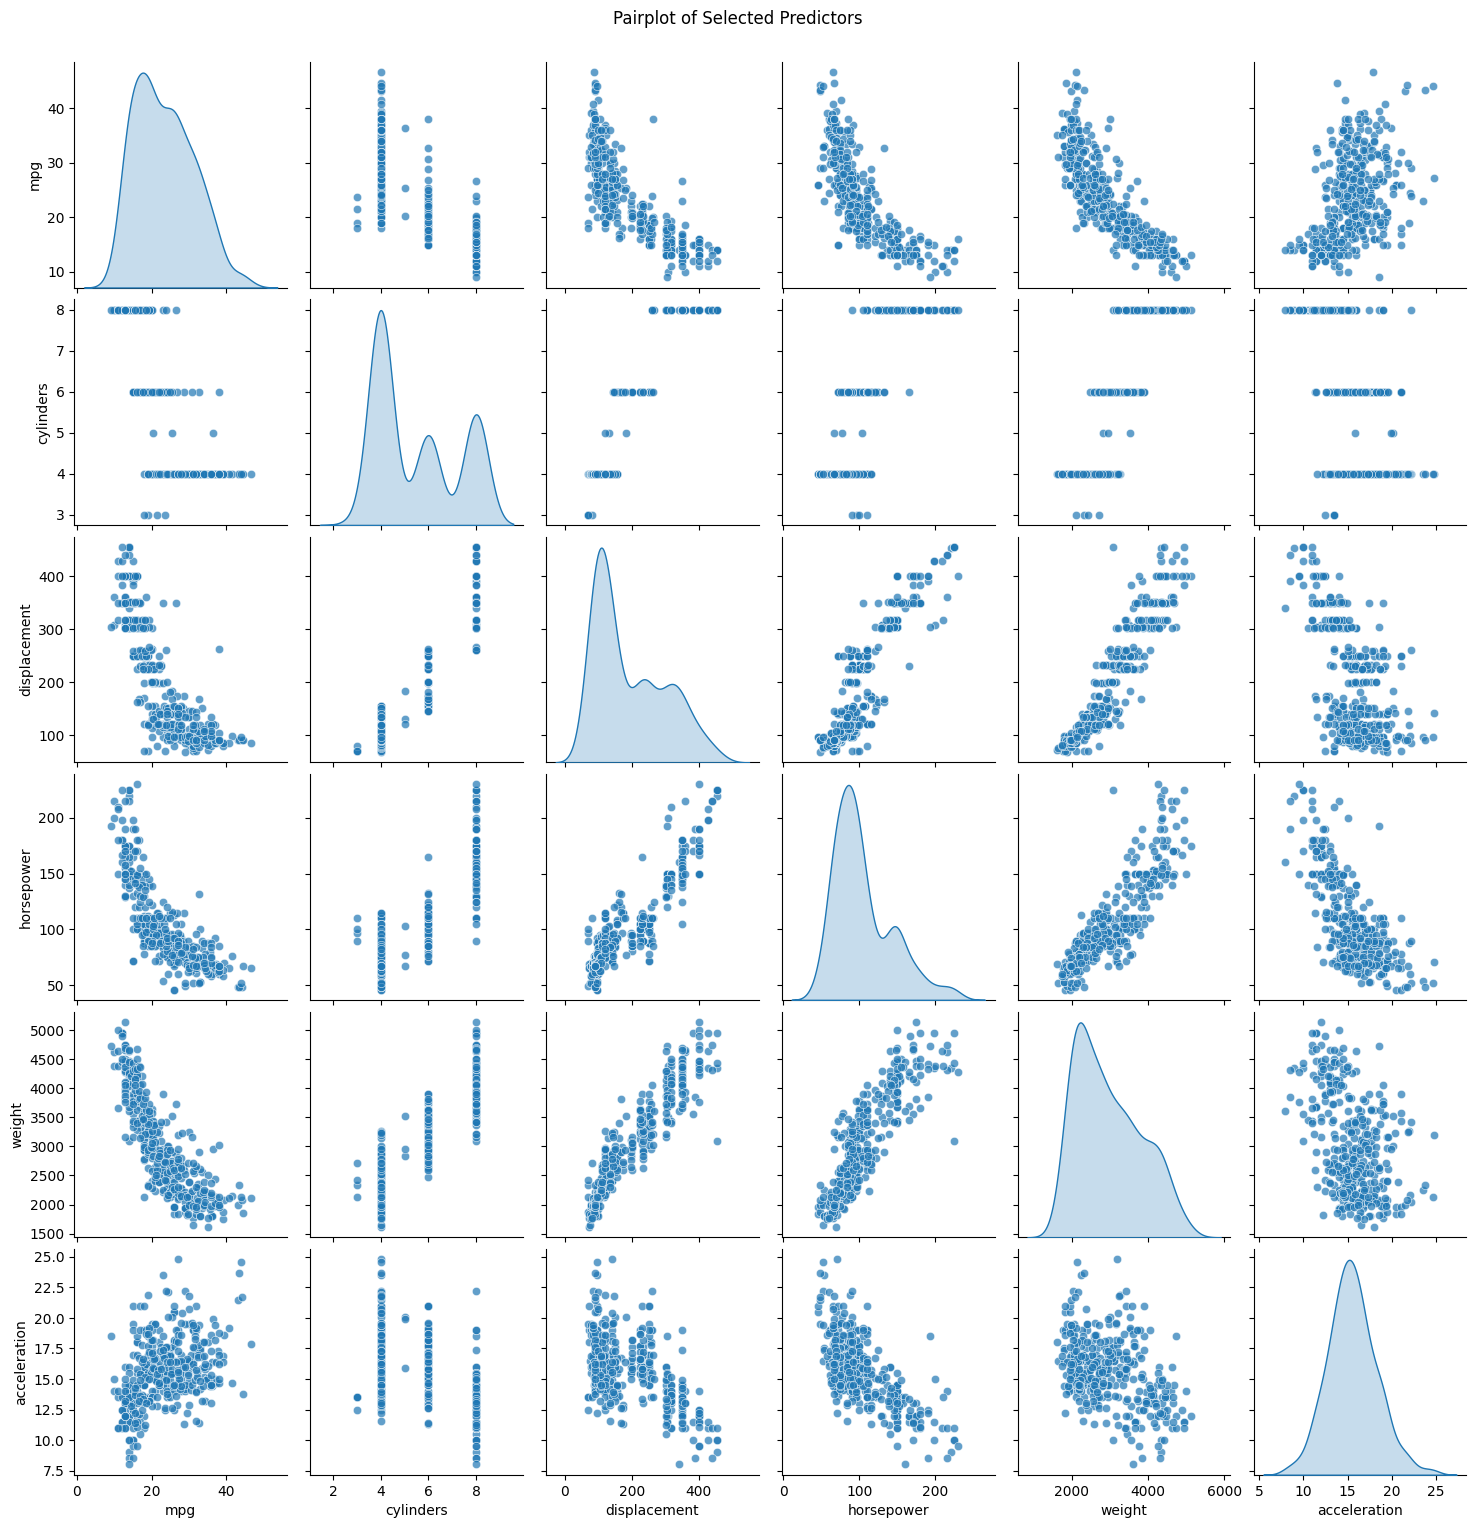

In [34]:
selected_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
sns.pairplot(Auto[selected_columns], diag_kind="kde", plot_kws={'alpha': 0.7})
plt.suptitle("Pairplot of Selected Predictors", y=1.02)
plt.show()
#

Your answer:
The scatterplots for Weight and Horsepower show strong linear relationships with MPG, making these the primary candidates for inclusion in a predictive model. Other variable like  Displacement may provide additional predictive power by capturing relationships. Including these variables would likely improve the accuracy and robustness of the model.

~~~
Please write your answer in full sentences.


~~~

### [Optional] College Data

This exercise relates to the `College` data set, found in the file College.csv on the book website. It contains several variables for 777 different universities and colleges in the US. The
variables are

- `Private` : Public/private indicator
- `Apps` : Number of applications received
- `Accept` : Number of applicants accepted
- `Enroll` : Number of new students enrolled
- `Top10perc` : New students from the top 10% of high school class
- `Top25perc` : New students from the top 25% of high school class
- `F.Undergrad` : Number of full-time undergraduates
- `P.Undergrad` : Number of part-time undergraduates
- `Outstate` : Out-of-state tuition
- `Room.Board` : Room and board costs
- `Books` : Estimated book costs
- `Personal` : Estimated personal spending
- `PhD` : Percent of faculty with Ph.D.’s
- `Terminal` : Percent of faculty with a terminal degree
- `S.F.Ratio` : Student/faculty ratio
- `perc.alumni` : Percent of alumni who donate
- `Expend` : Instructional expenditure per student
- `Grad.Rate` : Graduation rate

Before reading the data into R, it can be viewed in Excel or a text editor.

(a) Use the pd.read_csv() function to read the data into Python. Call the loaded data college. Make sure that you have the directory set to the correct location for the data.

Your code:

In [12]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(b) Look at the data used in the notebook by creating and running a new cell with just the code college in it. You should notice that the first column is just the name of each university in a column named something like Unnamed: 0. We don’t really want pandas to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly look at the resulting data frames:

In [13]:
college2 = pd.read_csv('College.csv')#, index_col=0)
college3 = college2.rename({'Unnamed: 0': 'College'},axis=1)
college3 = college3.set_index('College')

This has used the first column in the file as an index for the data frame. This means that pandas has given each row a name corresponding to the appropriate university. Now you should see that the first data column is Private. Note that the names of the colleges appear on the left of the table. We also introduced a new python object above: a dictionary, which is specified by (key, value) pairs. Keep your modified version of the data with
the following:

In [14]:
college = college3

(c)
  Use the describe() method of to produce a numerical summary of the variables in the data set.

Your code:

In [15]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~



(d) . Use the pd.plotting.scatter_matrix() function to produce a scatterplot matrix of the first columns [Top10perc, Apps, Enroll]. Recall that you can reference a list C of columns of a data frame A using A[C].

Your code:

In [16]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(e) Use the boxplot() method of college to produce side-by-side
boxplots of Outstate versus Private.

Your code:

In [17]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(f) Create a new qualitative variable, called Elite, by binning the
Top10perc variable into two groups based on whether or not the
proportion of students coming from the top 10% of their high
school classes exceeds 50%.

In [18]:
college['Elite'] = pd.cut(college['Top10perc'], [0,0.5,1], labels=['No', 'Yes'])

Use the `value_counts()` method of `college['Elite']` to see how many elite universities there are. Finally, use the `boxplot()` method again to produce side-by-side boxplots of Outstate versus Elite.

Your code:

In [19]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(g) Use the `plot.hist()` method of college to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command `plt.subplots(2, 2)` may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.

Your code:

In [20]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(h) Continue exploring the data, and provide a brief summary of what you discover.

Your code:

In [21]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~